<a href="https://colab.research.google.com/github/Dntfreitas/Dntfreitas.github.io/blob/master/UC%20Intelig%C3%AAncia%20Artificial/Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

In [2]:
# Vamos apenas verificar se temos uma GPU para treinar a(s) rede(s)
is_gpu_available = tf.config.list_physical_devices('GPU')
print('GPU is', 'AVAILABLE' if is_gpu_available else 'NOT AVAILABLE')

GPU is AVAILABLE


# **Passo 1**: Obter dados

Neste passo, vamos obter o conjunto de dados e separá-lo em dados de treino e em dados de teste.

In [3]:
X, y = fetch_california_housing(return_X_y=True)

O objectivo é usar as 8 características (_i.e._, _features_) de casas para predizer o valor médio das casas.

## Vamos explorar um pouco os dados

## Variável ``X``

In [4]:
X.shape

(20640, 8)

In [5]:
X.max(), X.min()

(35682.0, -124.35)

Cada linha do ``X`` corresponde a uma casa. O conjunto de dados tem um total de 20 640 exemplos.

## Variável ``Y``

In [6]:
y.shape

(20640,)

In [7]:
y.min(), y.max()

(0.14999, 5.00001)

# **Passo 2 e 3**: Pré-processamento dos dados e preparação dos dados

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Feature selection
sel = VarianceThreshold(0.4).fit(X_train)
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

# Feature normalization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Passo 4**: Inicialização do modelo

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(X_train.shape[-1])))
model.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [10]:
model.input_shape

(None, 7)

In [11]:
model.output_shape

(None, 1)

## Compilar o modelo

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

Vamos confirmar se era realmente isto o pretendido...

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


# **Passo 5**: Treino do modelo

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.1)

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, callbacks=[callback], validation_split=0.3)

Epoch 1/50
159/159 [==============================] - 3s 7ms/step - loss: 1.8841 - mean_squared_error: 1.8841 - mean_absolute_percentage_error: 61.8595 - val_loss: 1.1137 - val_mean_squared_error: 1.1137 - val_mean_absolute_percentage_error: 56.9248
Epoch 2/50
159/159 [==============================] - 1s 6ms/step - loss: 0.9619 - mean_squared_error: 0.9619 - mean_absolute_percentage_error: 51.2173 - val_loss: 0.8727 - val_mean_squared_error: 0.8727 - val_mean_absolute_percentage_error: 48.2433
Epoch 3/50
159/159 [==============================] - 1s 5ms/step - loss: 0.7360 - mean_squared_error: 0.7360 - mean_absolute_percentage_error: 41.9484 - val_loss: 0.6641 - val_mean_squared_error: 0.6641 - val_mean_absolute_percentage_error: 36.3055
Epoch 4/50
159/159 [==============================] - 1s 5ms/step - loss: 0.5872 - mean_squared_error: 0.5872 - mean_absolute_percentage_error: 34.1162 - val_loss: 0.5702 - val_mean_squared_error: 0.5702 - val_mean_absolute_percentage_error: 33.0928


### Curva da função de perda de treino

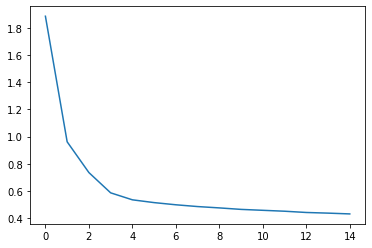

In [16]:
plt.plot(history.history['loss'])

### Curva da função de perda de validação

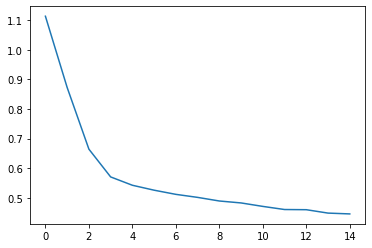

In [17]:
plt.plot(history.history['val_loss'])

# **Passo 6**: Avaliação do modelo

In [18]:
train_loss = model.evaluate(X_train, y_train)

452/452 [==============================] - 2s 3ms/step - loss: 0.4376 - mean_squared_error: 0.4376 - mean_absolute_percentage_error: 25.5562


In [19]:
test_loss = model.evaluate(X_test, y_test)

194/194 [==============================] - 1s 3ms/step - loss: 0.4110 - mean_squared_error: 0.4110 - mean_absolute_percentage_error: 24.6240


In [20]:
y_pred_train = model.predict(X_train)  # cálculo das saídas

y_pred_test_prob = model.predict(X_test)  # cálculo das saídas